# 3 Caminos de una PCB

Solución que recorre todas las posibilidades, sin devolverse en filas o columnas

In [ ]:
import numpy as np

class PCB:
    def __init__(self, N, M):
        self.N = N
        self.M = M

    def contar(self):
#Se comienza el recorrido desde la esquina inferior derecha
        x_i = [self.N - 1]
        y_i = [0]
        caminos = 0

        while len(x_i) > 0:
            x = x_i.pop()
            y = y_i.pop()

            if x == 0 and y == self.M - 1:
                caminos += 1
                continue

            if y + 1 < self.M:
                x_i.append(x)
                y_i.append(y+1)

            if x - 1 >= 0:
                x_i.append(x-1)
                y_i.append(y)

        return caminos

prueba = PCB(3,2)
prueba.contar()

3

Solución recursiva

In [ ]:
class PCB:
    def __init__(self, N, M):
        self.N = N
        self.M = M

    def contarRecursivo(self, x=None, y=None):

      if x is None or y is None:
          x, y = self.N - 1, self.M - 1

      if x == 0 or y == 0:
          return 1

      caminos_desde_arriba = self.contarRecursivo(x - 1, y)
      caminos_desde_izquierda = self.contarRecursivo(x, y - 1)

      return caminos_desde_arriba + caminos_desde_izquierda

prueba = PCB(3, 3)
print(prueba.contarRecursivo())

#Si juntamo slas dos

class PCB:
    def __init__(self, N, M):
        self.N = N
        self.M = M
    def contar(self):
          celdas = [(self.N - 1, 0)]
          count = 0

          while len(celdas) > 0:
              x, y = celdas.pop()
              if x == 0 and y == self.M - 1:
                  count += 1
                  continue

              if y + 1 < self.M:
                  celdas.append((x, y + 1))

              if x - 1 >= 0:
                  celdas.append((x - 1, y))

          return count

    def contarRecursivo(self, x=None, y=None):

      if x is None or y is None:
          x, y = self.N - 1, self.M - 1

      if x == 0 or y == 0:
          return 1

      caminos_desde_arriba = self.contarRecursivo(x - 1, y)
      caminos_desde_izquierda = self.contarRecursivo(x, y - 1)

      return caminos_desde_arriba + caminos_desde_izquierda

prueba = PCB(3, 3)
print(prueba.contarRecursivo())

6
6


Calculo del tiempo


In [ ]:
import time

def mide_tiempo(funcion):
    def funcion_medida(*args, **kwargs):
        inicio = time.time()
        resultado = funcion(*args, **kwargs)
        fin = time.time()
        print(f"{funcion.__name__}: {fin - inicio:.6f}")
        return resultado
    return funcion_medida

class PCB:
    @mide_tiempo
    def __init__(self, N, M):
        self.N = N
        self.M = M

    @mide_tiempo
    def contar(self):
        celdas = [(self.N - 1, 0)]
        count = 0

        while len(celdas) > 0:
            x, y = celdas.pop()
            if x == 0 and y == self.M - 1:
                count += 1
                continue

            if y + 1 < self.M:
                celdas.append((x, y + 1))

            if x - 1 >= 0:
                celdas.append((x - 1, y))

        return count

#Ahora tocó dividir la función contar recursivo en dos, dado que de otra manera, se medía el tiempo de cada recursión e imprimía varios valores
    @mide_tiempo
    def contarRecursivo(self):
        return self._contarRecursivo(self.N - 1, self.M - 1)

    def _contarRecursivo(self, x, y):
        if x == 0 or y == 0:
            return 1

        caminos_desde_arriba = self._contarRecursivo(x - 1, y)
        caminos_desde_izquierda = self._contarRecursivo(x, y - 1)

        return caminos_desde_arriba + caminos_desde_izquierda

prueba = PCB(3, 3)
print("Resultado contar:", prueba.contar())
print("Resultado contarRecursivo:", prueba.contarRecursivo())


__init__: 0.000003
contar: 0.000021
Resultado contar: 6
contarRecursivo: 0.000007
Resultado contarRecursivo: 6


In [ ]:
import matplotlib.pyplot as plt

#Acá tenía la intención de guardar los tiempos en un arreglo, pero no se me ocurrió como, dado que llamar a la función pcb.contar() sólo me devolvía el resultado, no el tiempo de ejecución
#Así que se grafican guardando los resultados manualmente en un arreglo

tamaños = range(2, 10)
tiempos_iterativo = []
tiempos_recursivo = []

for tamaño in tamaños:
    pcb = PCB(tamaño, tamaño)
    pcb.contar()
    pcb.contarRecursivo()



__init__: 0.000003
contar: 0.000013
contarRecursivo: 0.000005
__init__: 0.000002
contar: 0.000017
contarRecursivo: 0.000005
__init__: 0.000001
contar: 0.000043
contarRecursivo: 0.000024
__init__: 0.000001
contar: 0.000194
contarRecursivo: 0.000048
__init__: 0.000003
contar: 0.000524
contarRecursivo: 0.000148
__init__: 0.000002
contar: 0.002000
contarRecursivo: 0.000526
__init__: 0.000002
contar: 0.009247
contarRecursivo: 0.001261
__init__: 0.000002
contar: 0.021750
contarRecursivo: 0.004591


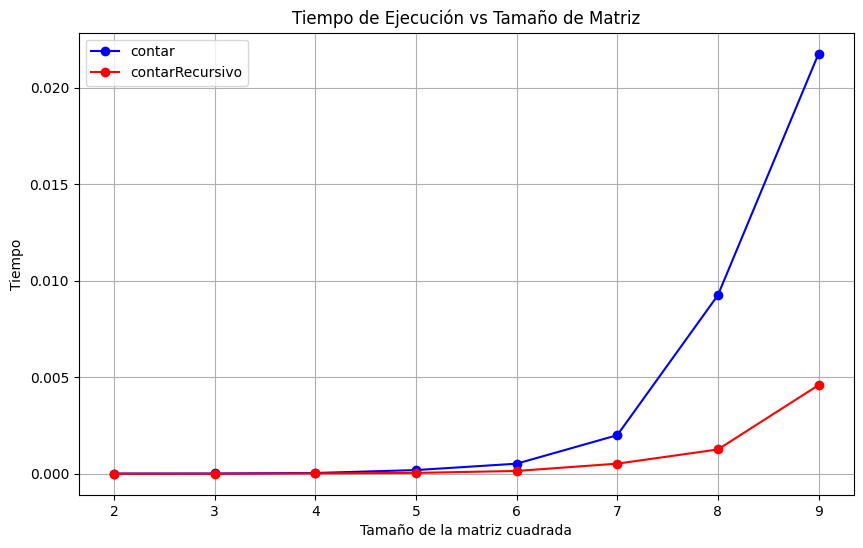

In [ ]:
import matplotlib.pyplot as plt

matrices = list(range(2, 10))
contar = [0.000013, 0.000017, 0.000043, 0.000194, 0.000524, 0.002000, 0.009247, 0.021750]
contar_recursivo = [0.000005, 0.000005, 0.000024, 0.000048, 0.000148, 0.000526, 0.001261, 0.004591]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(matrices, contar, label='contar', marker='o', color='b')
plt.plot(matrices, contar_recursivo, label='contarRecursivo', marker='o', color='r')

# Configurar etiquetas y título
plt.xlabel('Tamaño de la matriz cuadrada')
plt.ylabel('Tiempo')
plt.title('Tiempo de Ejecución vs Tamaño de Matriz')
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()


Se divide la función contarRecursivo() en dos, porque de lo contrario se mide el tiempo de cada recursión como se muestra a continuación


In [ ]:
import time


def mide_tiempo(funcion):
    def funcion_medida(*args, **kwargs):
        inicio = time.time()
        c = funcion(*args, **kwargs)
        print(time.time() - inicio)
        return c
    return funcion_medida

class PCB:
    @mide_tiempo
    def __init__(self, N, M):
        self.N = N
        self.M = M

    @mide_tiempo
    def contar(self):
          celdas = [(self.N - 1, 0)]
          count = 0

          while len(celdas) > 0:
              x, y = celdas.pop()
              if x == 0 and y == self.M - 1:
                  count += 1
                  continue

              if y + 1 < self.M:
                  celdas.append((x, y + 1))

              if x - 1 >= 0:
                  celdas.append((x - 1, y))

          return count

    @mide_tiempo
    def contarRecursivo(self, x=None, y=None):

      if x is None or y is None:
          x, y = self.N - 1, self.M - 1

      if x == 0 or y == 0:
          return 1

      caminos_desde_arriba = self.contarRecursivo(x - 1, y)
      caminos_desde_izquierda = self.contarRecursivo(x, y - 1)

      return caminos_desde_arriba + caminos_desde_izquierda

prueba = PCB(3, 3)
print("Resultado contar:", prueba.contar())
print("Resultado contarRecursivo:", prueba.contarRecursivo())

1.9073486328125e-06
1.8596649169921875e-05
Resultado contar: 6
9.5367431640625e-07
1.430511474609375e-06
9.5367431640625e-07
9.179115295410156e-05
0.0031282901763916016
4.76837158203125e-07
4.76837158203125e-07
3.361701965332031e-05
4.76837158203125e-07
6.4849853515625e-05
0.003229856491088867
Resultado contarRecursivo: 6
